# Early Detection of Chronic Kidney Disease Using Machine Learning Techniques

## Exploratory Data Analysis (EDA)

In [1]:
# importing all the necessary libraries and classes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading ckd cleaned dataset

df= pd.read_csv('kidney_disease_dataset_cleaned.csv')
df.head(10)


age  bloodPressure  specificGravity  albumin  sugar redBloodCells  \
0  48.0           80.0            1.020      1.0    0.0           NaN   
1   7.0           50.0            1.020      4.0    0.0           NaN   
2  62.0           80.0            1.010      2.0    3.0        normal   
3  48.0           70.0            1.005      4.0    0.0        normal   
4  51.0           80.0            1.010      2.0    0.0        normal   
5  60.0           90.0            1.015      3.0    0.0           NaN   
6  68.0           70.0            1.010      0.0    0.0           NaN   
7  24.0            NaN            1.015      2.0    4.0        normal   
8  52.0          100.0            1.015      3.0    0.0        normal   
9  53.0           90.0            1.020      2.0    0.0      abnormal   

   pusCells pusCellClumps    bacteria  bloodGlucoseRandom  ...  \
0    normal    notpresent  notpresent               121.0  ...   
1    normal    notpresent  notpresent                 NaN  ...   
2    normal    notpresent  notpresent               423.0  ...   
3  abnormal       present  notpresent               117.0  ...   
4    normal    notpresent  notpresent               106.0  ...   
5       NaN    notpresent  notpresent                74.0  ...   
6    normal    notpresent  notpresent               100.0  ...   
7  abnormal    notpresent  notpresent               410.0  ...   
8  abnormal       present  notpresent               138.0  ...   
9  abnormal       present  notpresent                70.0  ...   

   packedCellVolume  whiteBloodCellCount  redBloodCellCount  hypertension  \
0              44.0               7800.0                5.2           yes   
1              38.0               6000.0                NaN            no   
2              31.0               7500.0                NaN            no   
3              32.0               6700.0                3.9           yes   
4              35.0               7300.0                4.6            no   
5              39.0               7800.0                4.4           yes   
6              36.0                  NaN                NaN            no   
7              44.0               6900.0                5.0            no   
8              33.0               9600.0                4.0           yes   
9              29.0              12100.0                3.7           yes   

   diabetesMellitus  coronaryArteryDisease  appetite  pedalEdema anemia class  
0               yes                     no      good          no     no   ckd  
1                no                     no      good          no     no   ckd  
2               yes                     no      poor          no    yes   ckd  
3                no                     no      poor         yes    yes   ckd  
4                no                     no      good          no     no   ckd  
5               yes                     no      good         yes     no   ckd  
6                no                     no      good          no     no   ckd  
7               yes                     no      good         yes     no   ckd  
8               yes                     no      good          no    yes   ckd  
9               yes                     no      poor          no    yes   ckd  

[10 rows x 25 columns]

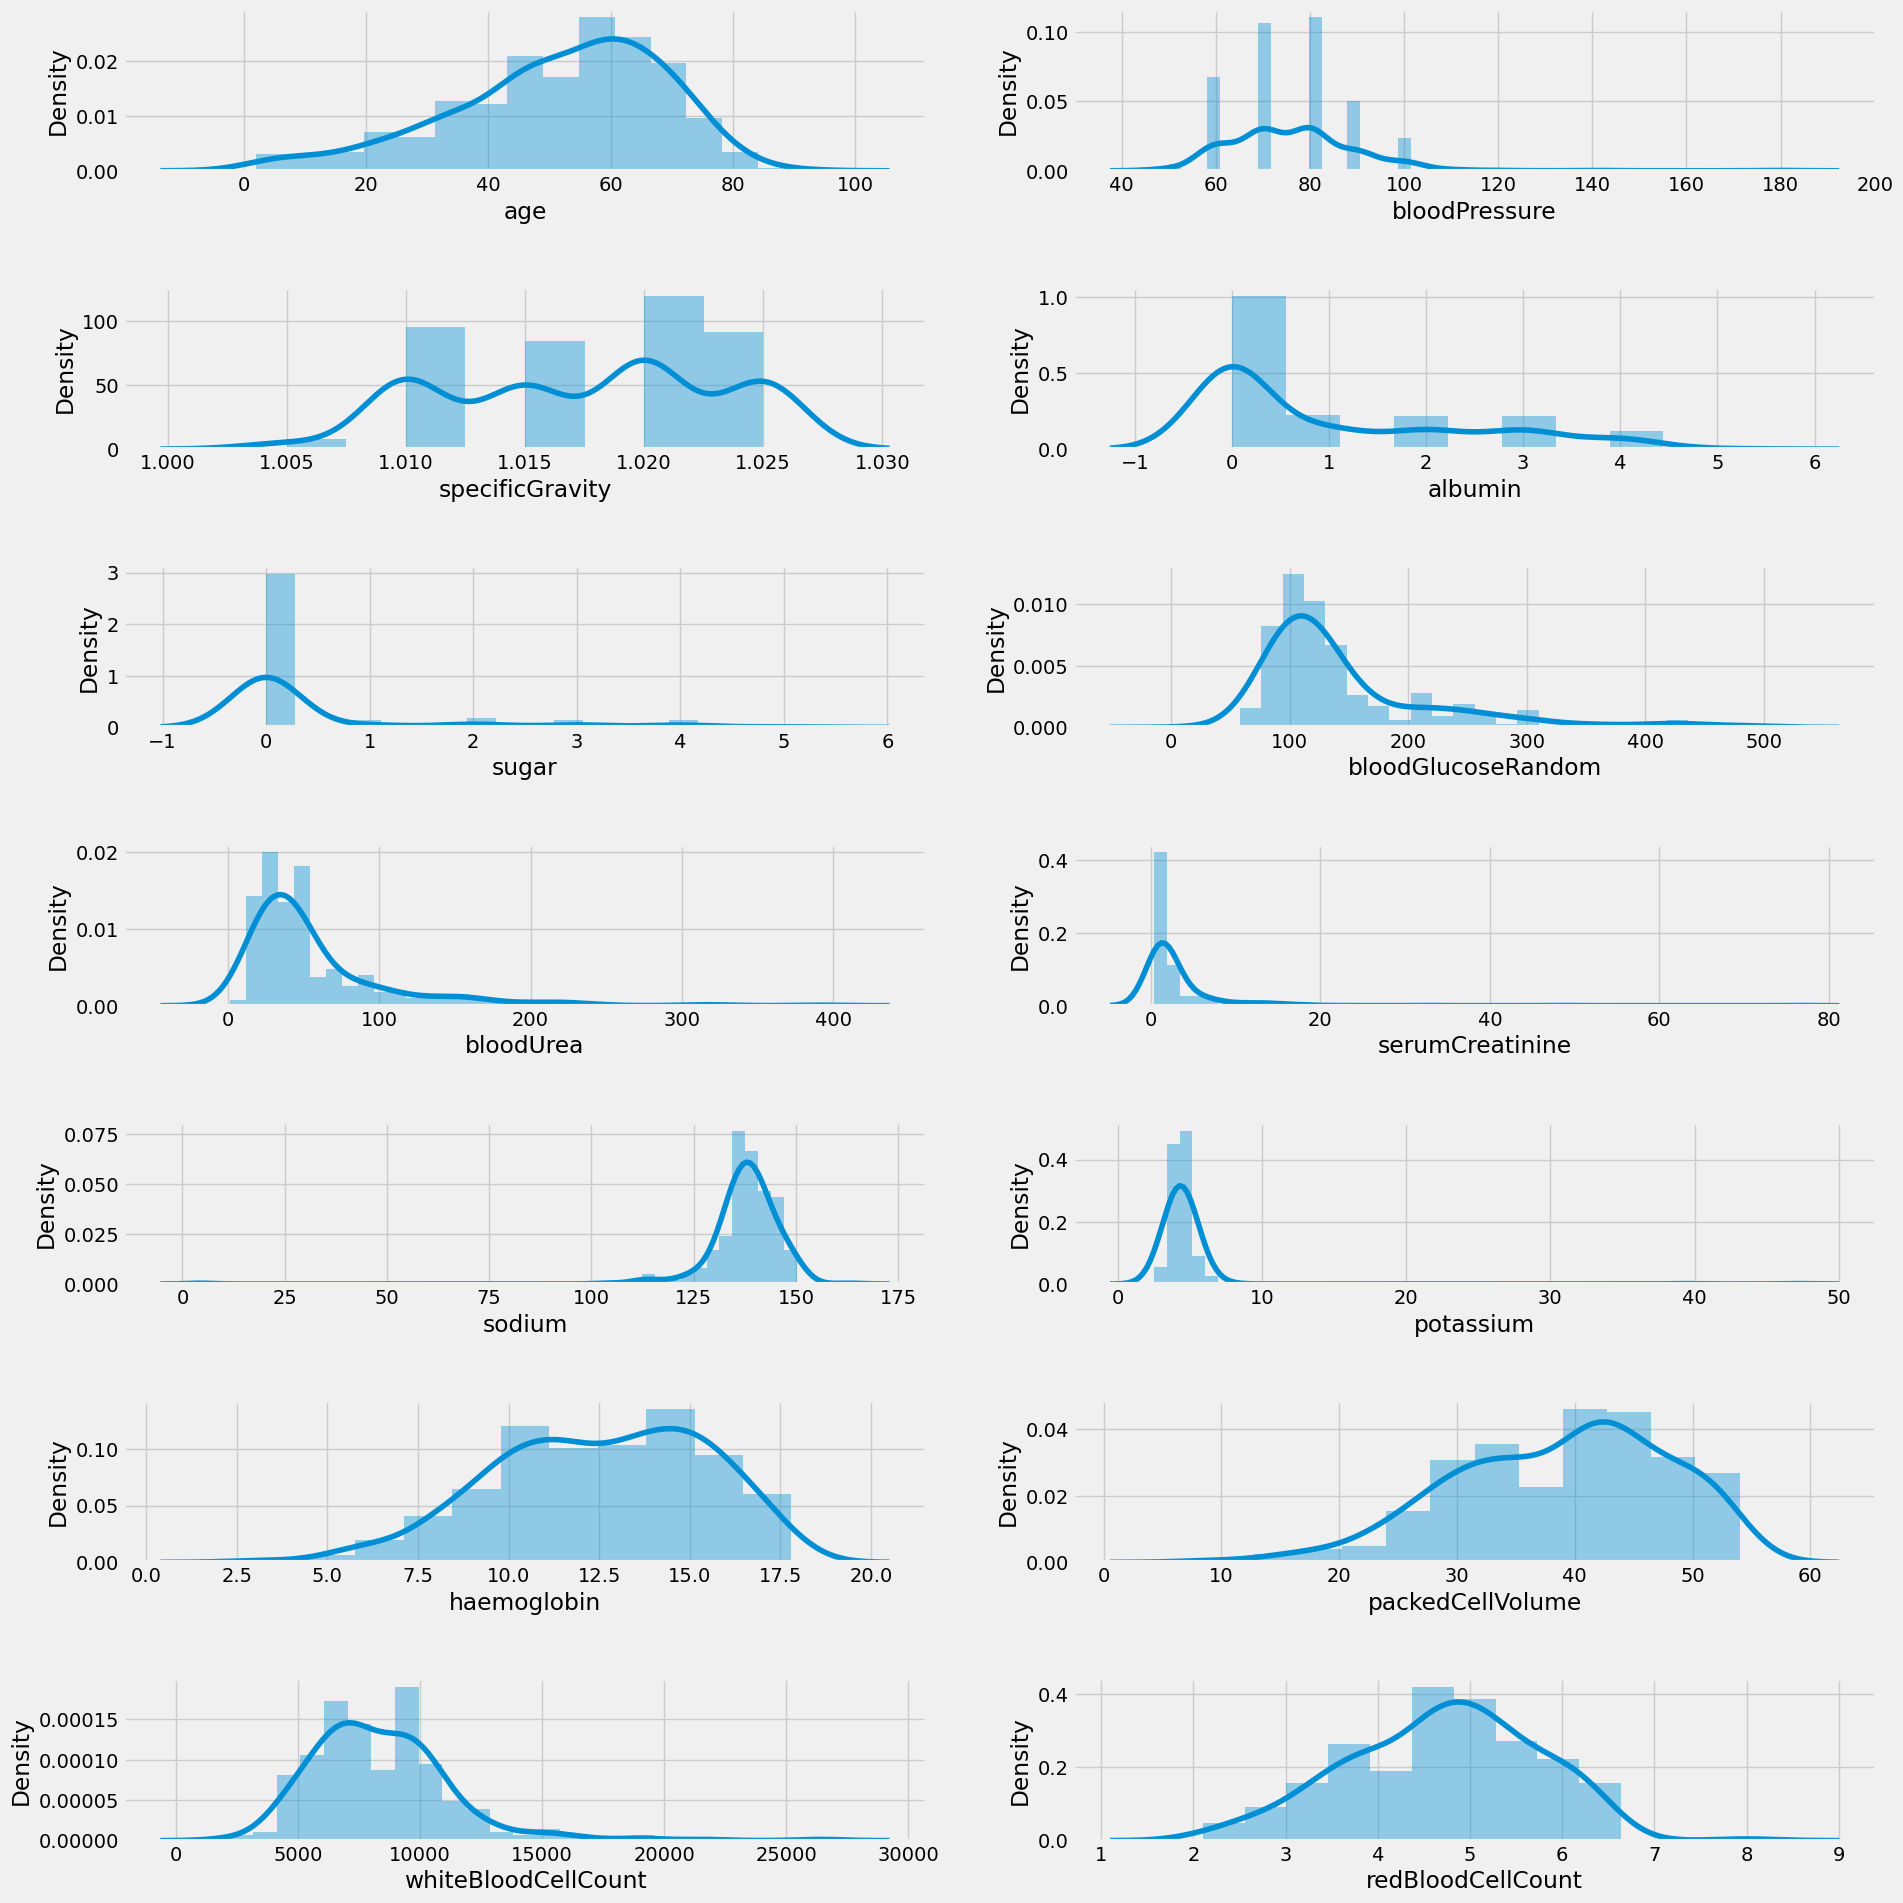

In [3]:
#numerical feature distribution
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

plt.style.use('fivethirtyeight')

plt.figure(figsize = (20, 20))
plotCount = 1

for col in numerical_cols:
    if plotCount <= len(numerical_cols):
        ax = plt.subplot(7, 2,plotCount)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotCount+=1

    
plt.tight_layout(pad = 3)
plt.show()

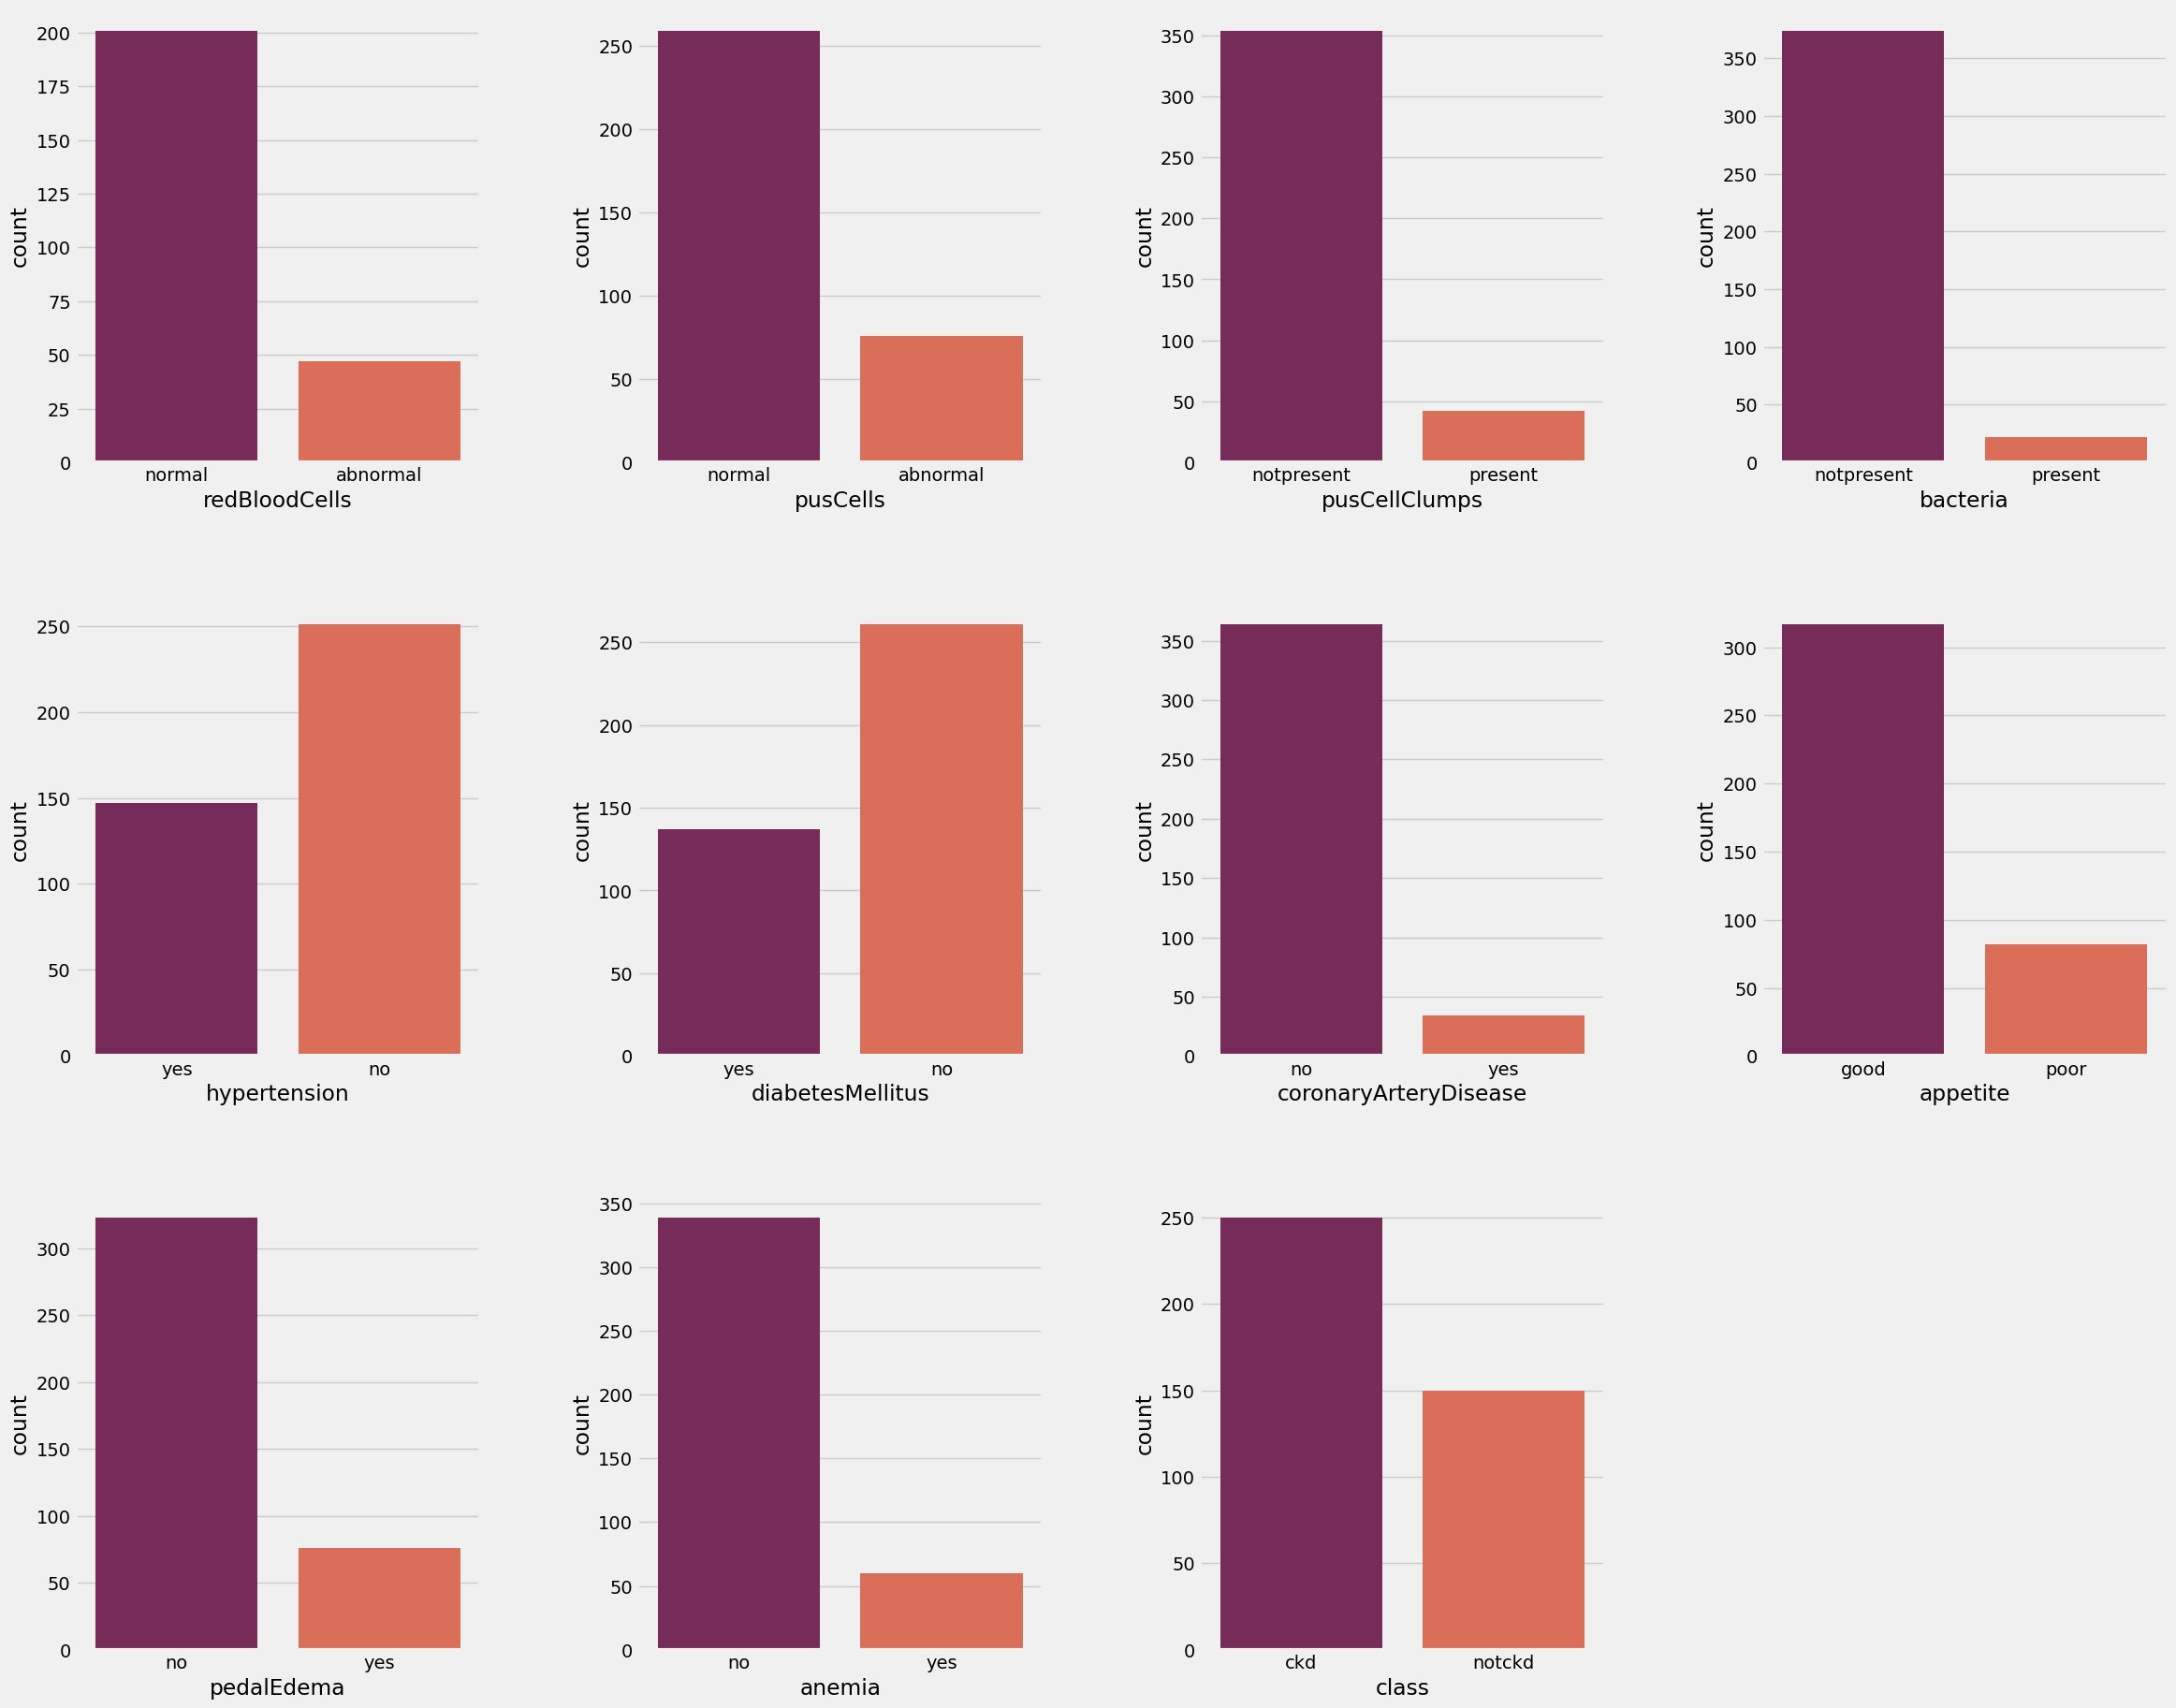

In [4]:
 #categorical columns label distribution
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

plt.figure(figsize = (25, 20))
plotCount = 1

for col in categorical_cols:
    if plotCount <= len(categorical_cols):
        ax = plt.subplot(3, 4, plotCount)
        sns.countplot(data=df, x=col, palette = 'rocket')
        plt.xlabel(col)

    plotCount += 1

plt.tight_layout(pad = 5)
plt.show()

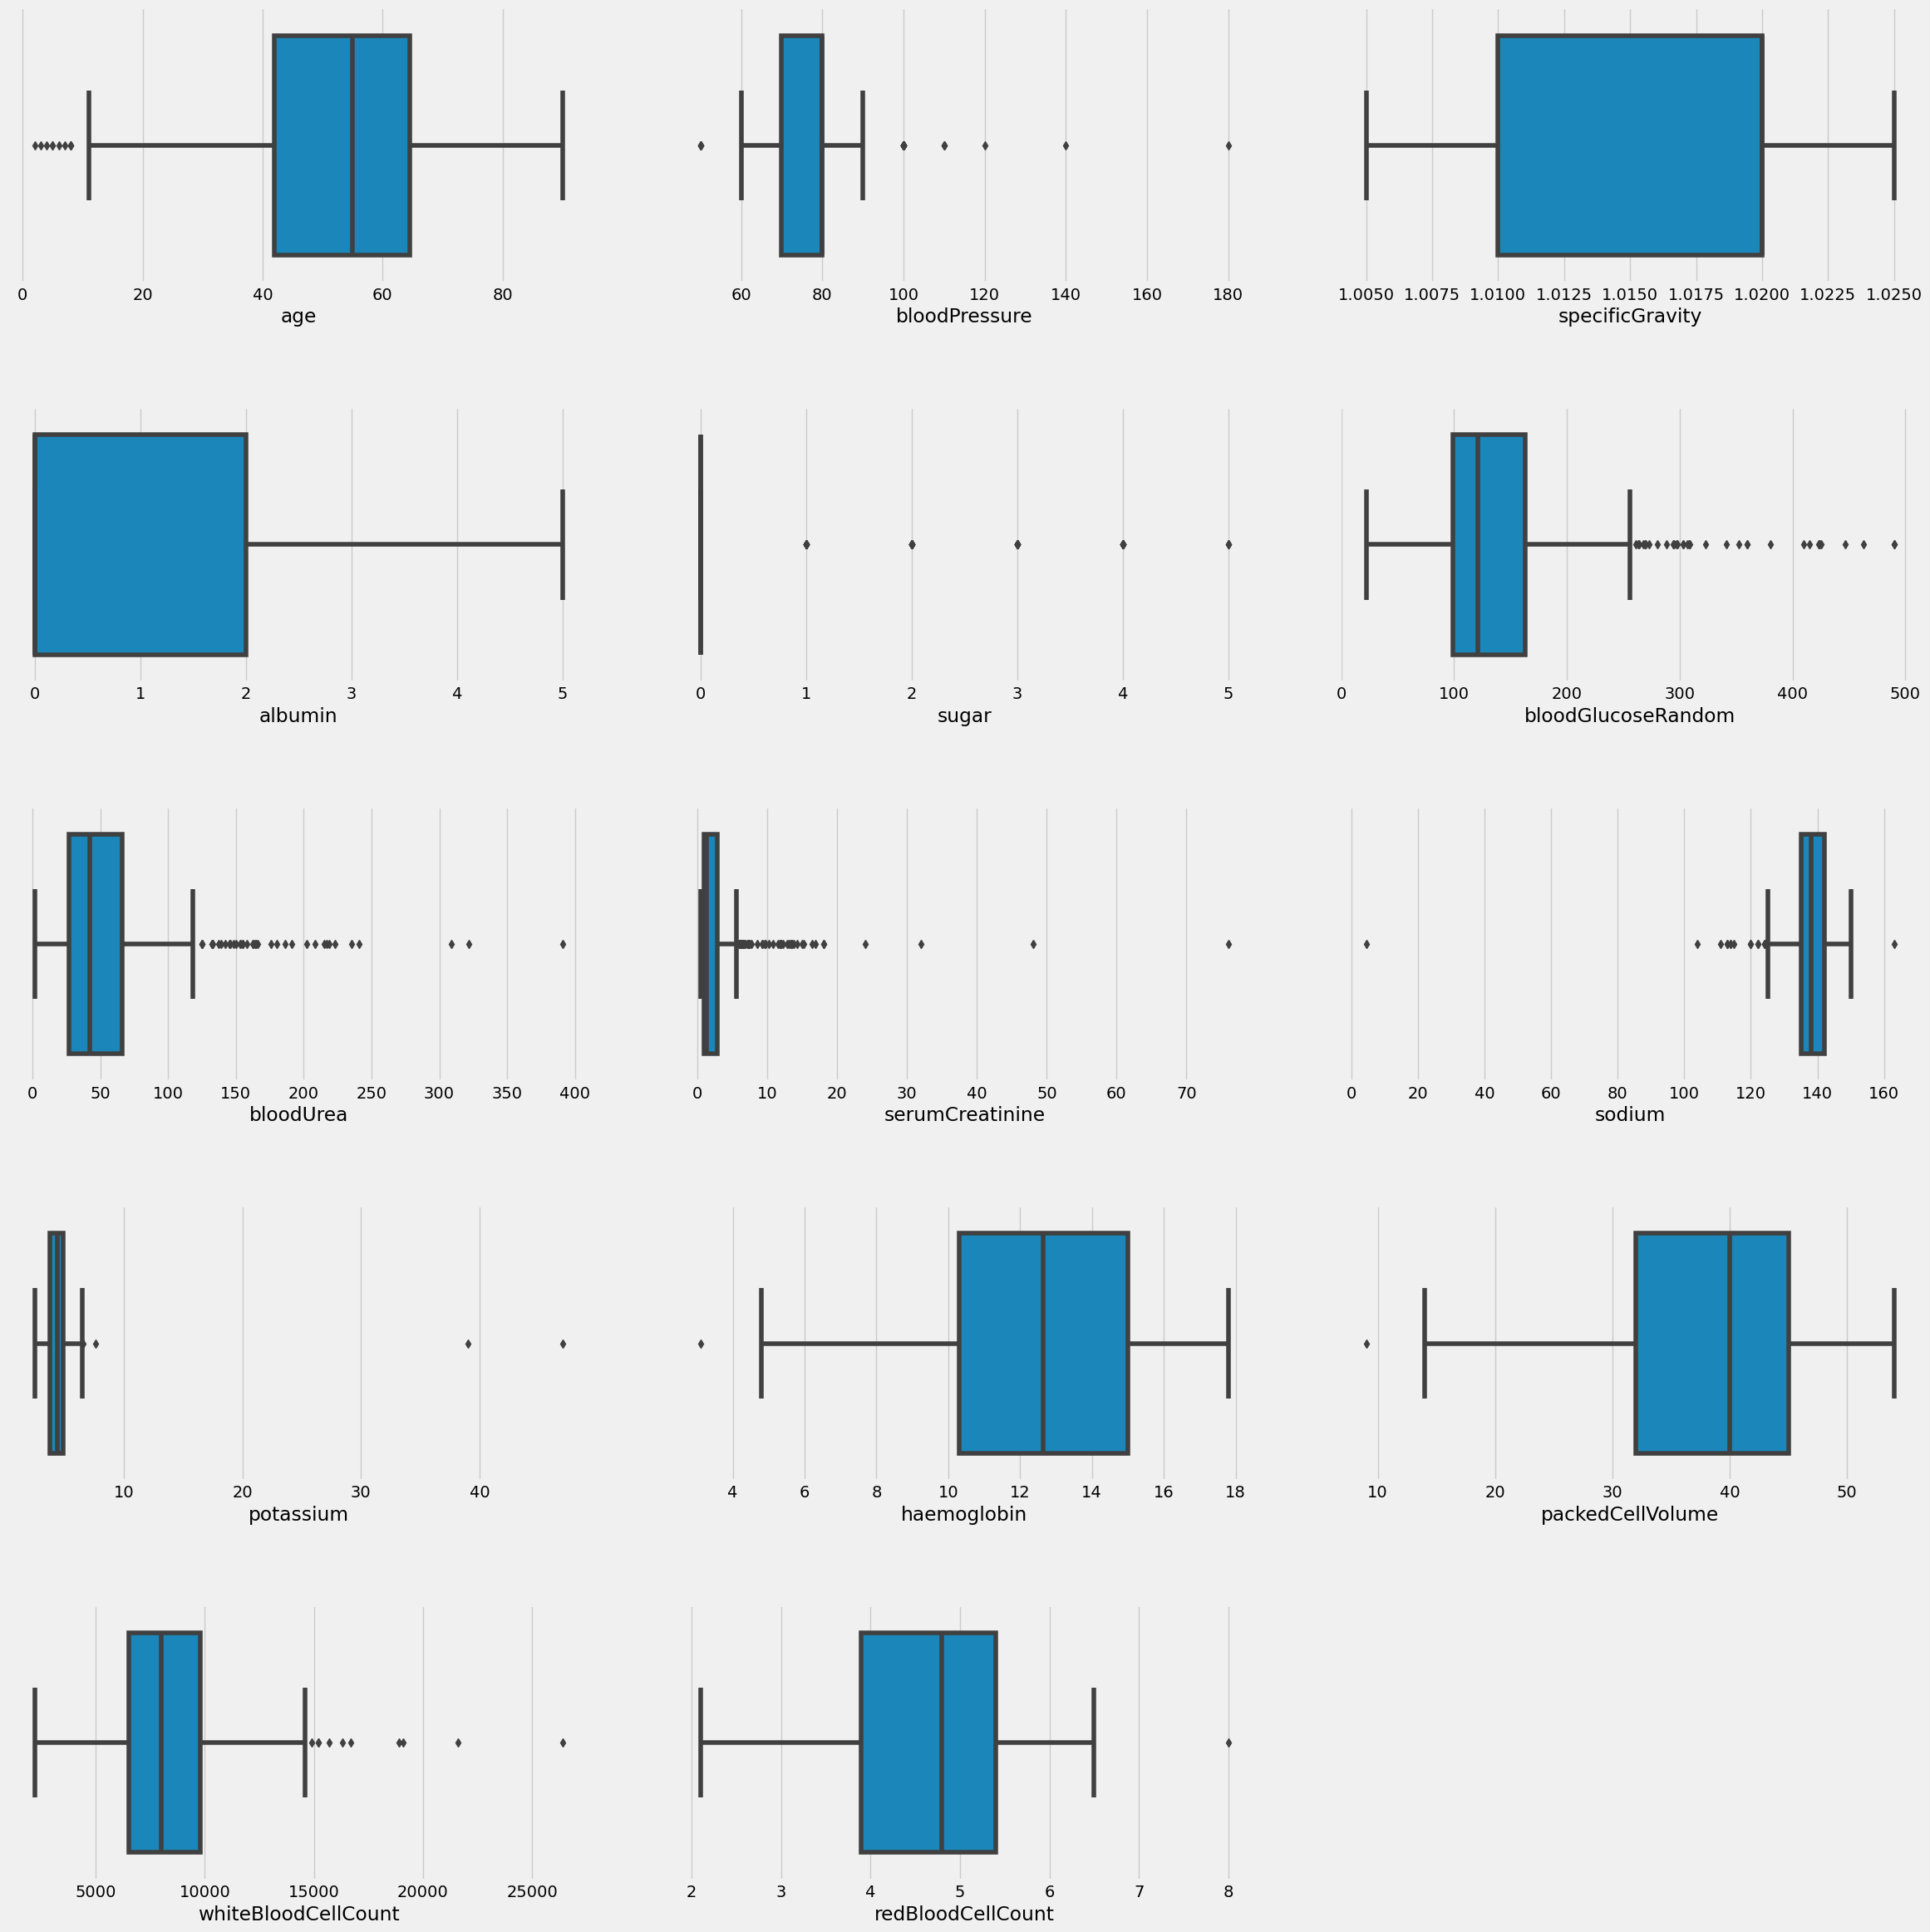

In [5]:
#finding outliers for numerical columns
plt.figure(figsize = (25, 25))
plotCount = 1

for col in numerical_cols:
    if plotCount <= len(numerical_cols):
        ax = plt.subplot(5, 3,plotCount)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plotCount+=1

    
plt.tight_layout(pad = 5)
plt.show()

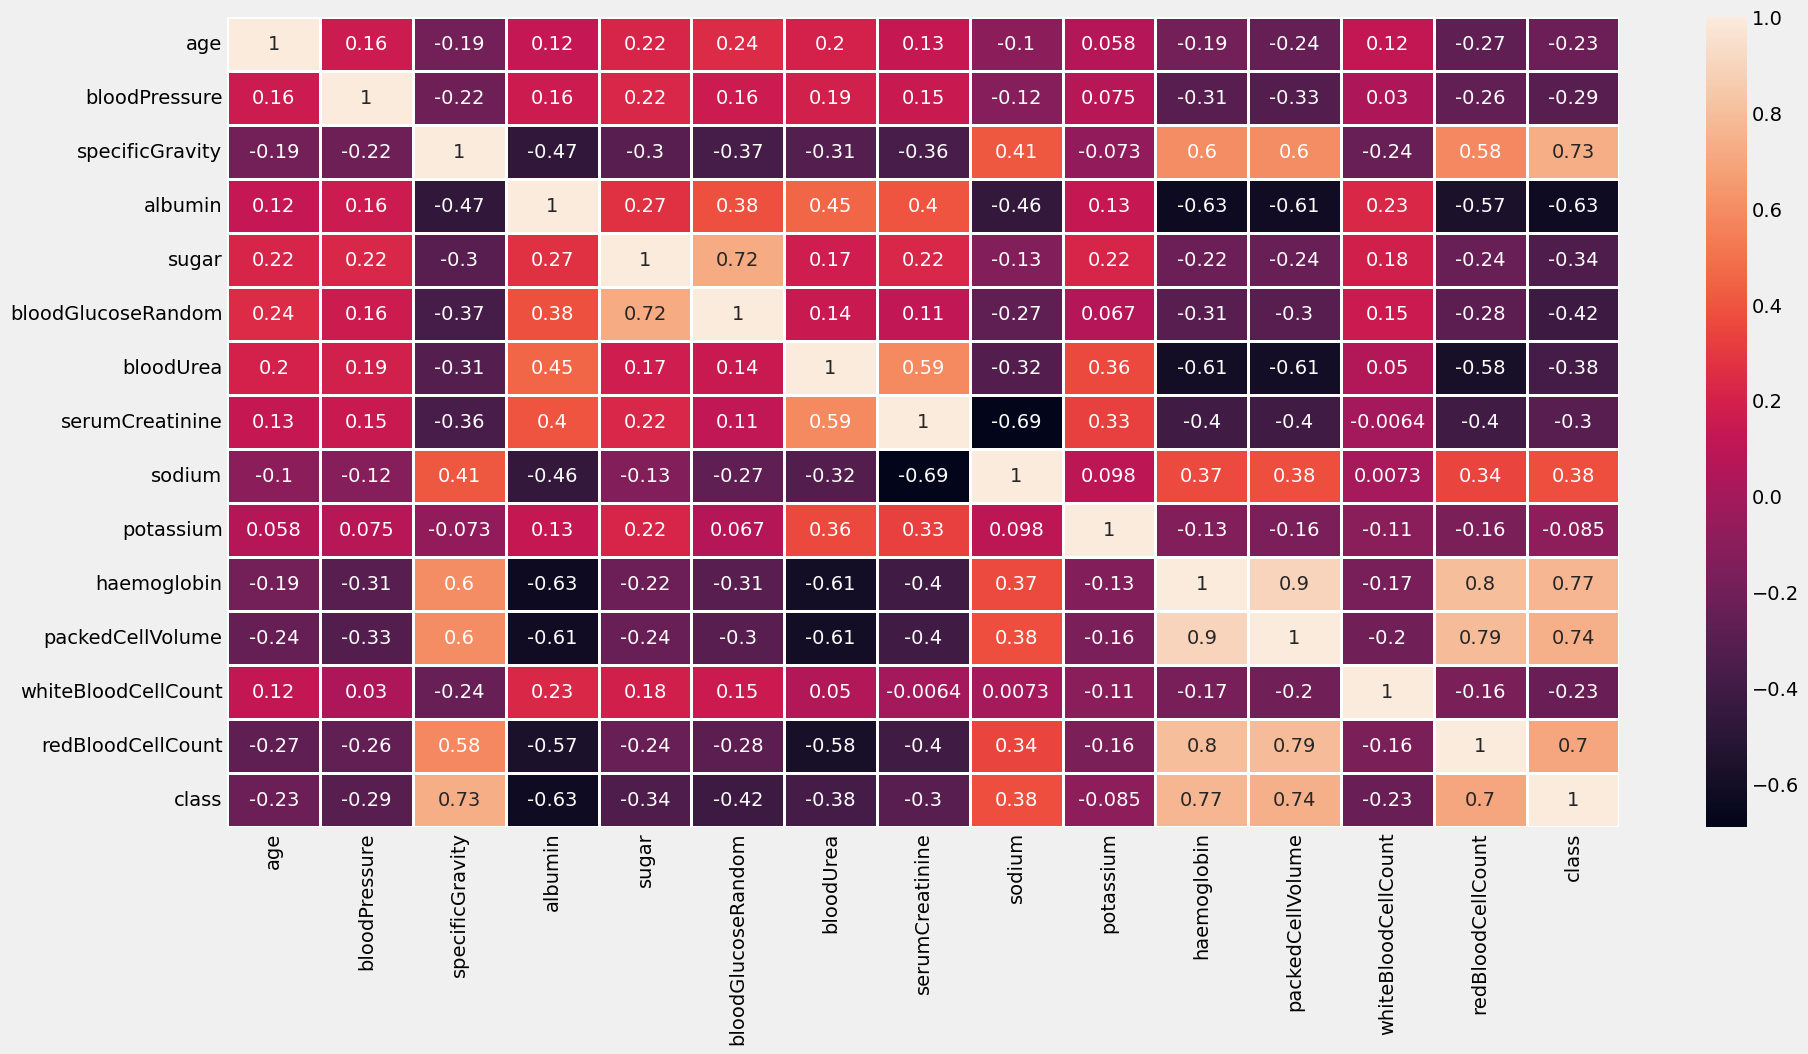

In [6]:
# finding correaltions from heatmap of data before data preprocessing

corr_df = df.copy()
corr_df['class'] = corr_df['class'].map({'ckd': 0, 'notckd': 1})
corr_df['class'] = pd.to_numeric(corr_df['class'], errors='coerce')

plt.figure(figsize = (20, 10))

sns.heatmap(corr_df.corr(), annot = True, linewidths = 2)
plt.show()

## Data Visualization 

In [7]:
df.columns

Index(['age', 'bloodPressure', 'specificGravity', 'albumin', 'sugar',
       'redBloodCells', 'pusCells', 'pusCellClumps', 'bacteria',
       'bloodGlucoseRandom', 'bloodUrea', 'serumCreatinine', 'sodium',
       'potassium', 'haemoglobin', 'packedCellVolume', 'whiteBloodCellCount',
       'redBloodCellCount', 'hypertension', 'diabetesMellitus',
       'coronaryArteryDisease', 'appetite', 'pedalEdema', 'anemia', 'class'],
      dtype='object')

In [8]:
# defining functions to create various data visualization plots

def violinPlot(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def kdePlot(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatterPlot(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [9]:
numerical_cols

['age',
 'bloodPressure',
 'specificGravity',
 'albumin',
 'sugar',
 'bloodGlucoseRandom',
 'bloodUrea',
 'serumCreatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packedCellVolume',
 'whiteBloodCellCount',
 'redBloodCellCount']

In [10]:
violinPlot('redBloodCellCount')
    

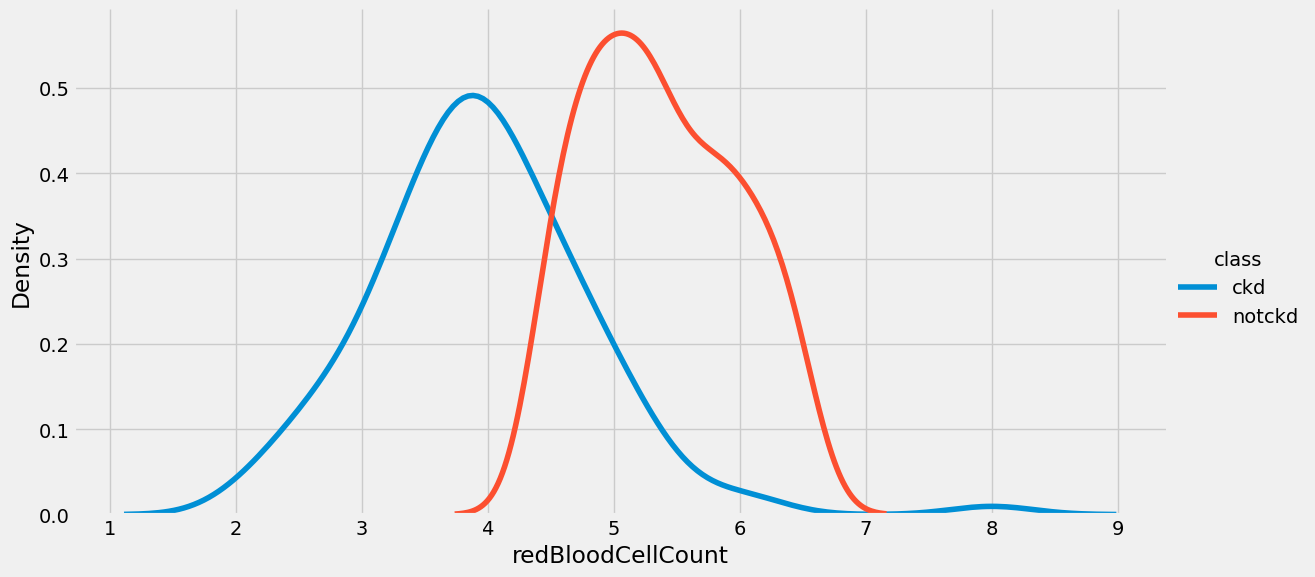

In [11]:
kdePlot('redBloodCellCount')

In [12]:
violinPlot('whiteBloodCellCount')

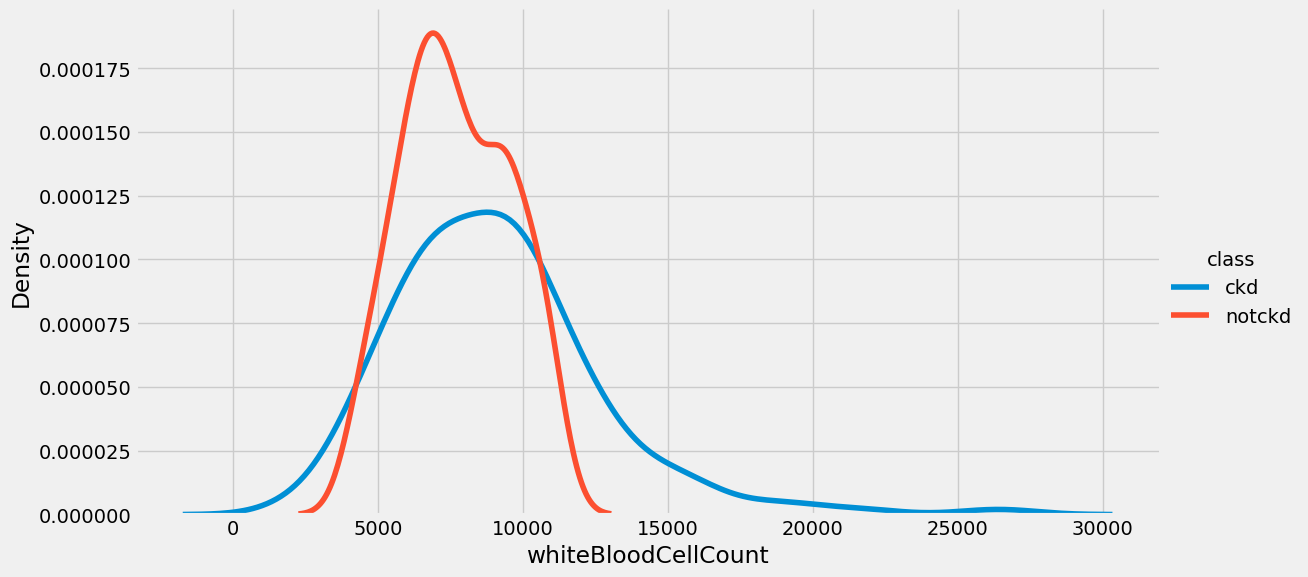

In [13]:
kdePlot('whiteBloodCellCount')

In [14]:
violinPlot('packedCellVolume')

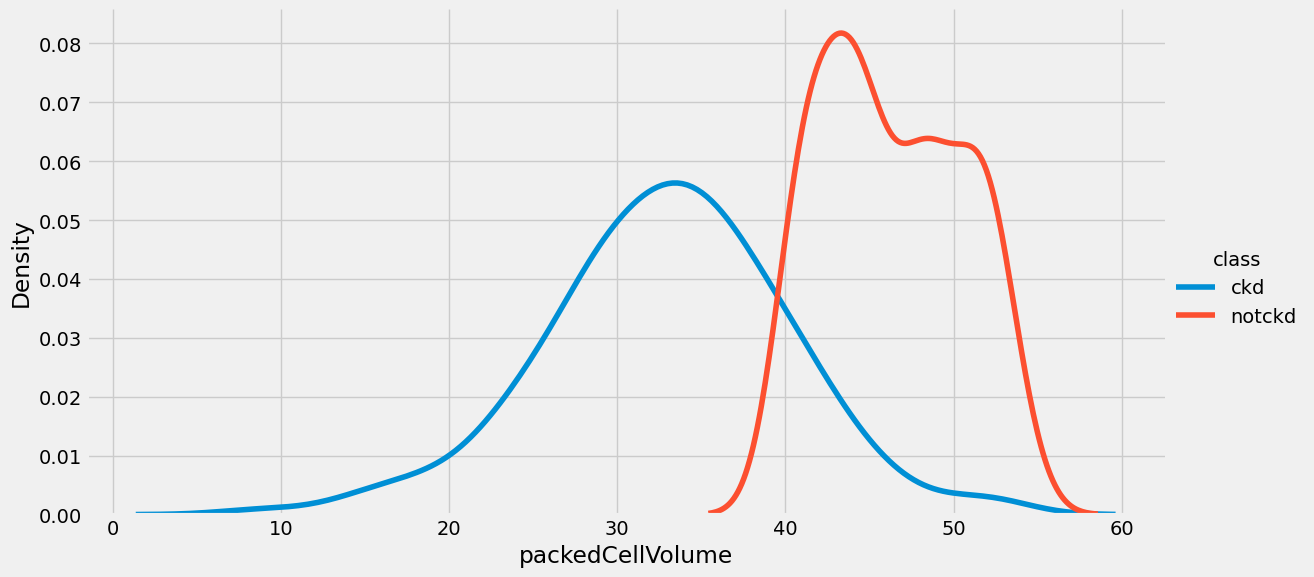

In [15]:
kdePlot('packedCellVolume')

In [16]:
violinPlot('haemoglobin')

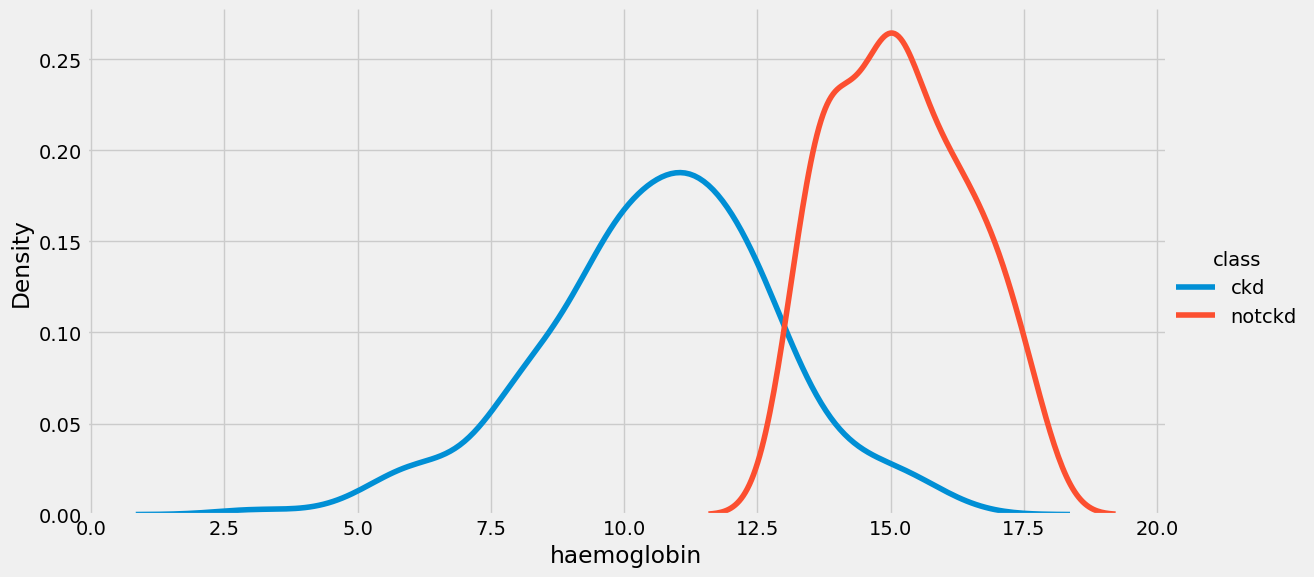

In [17]:
kdePlot('haemoglobin')

In [18]:
violinPlot('bloodGlucoseRandom')

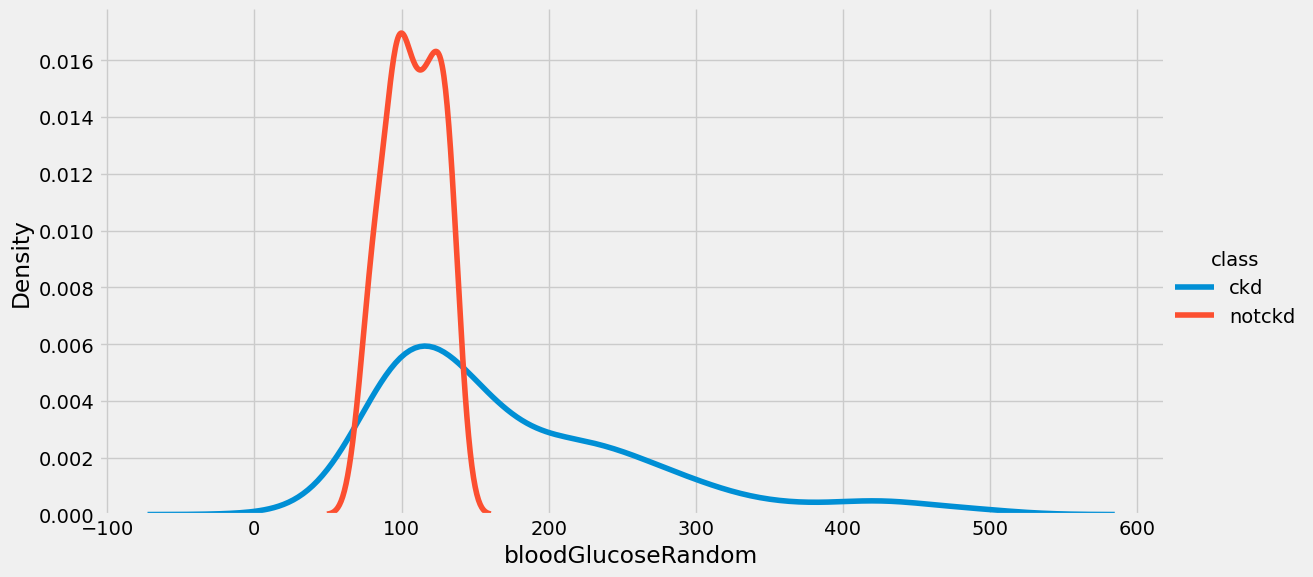

In [19]:
kdePlot('bloodGlucoseRandom')

In [20]:
violinPlot('bloodUrea')

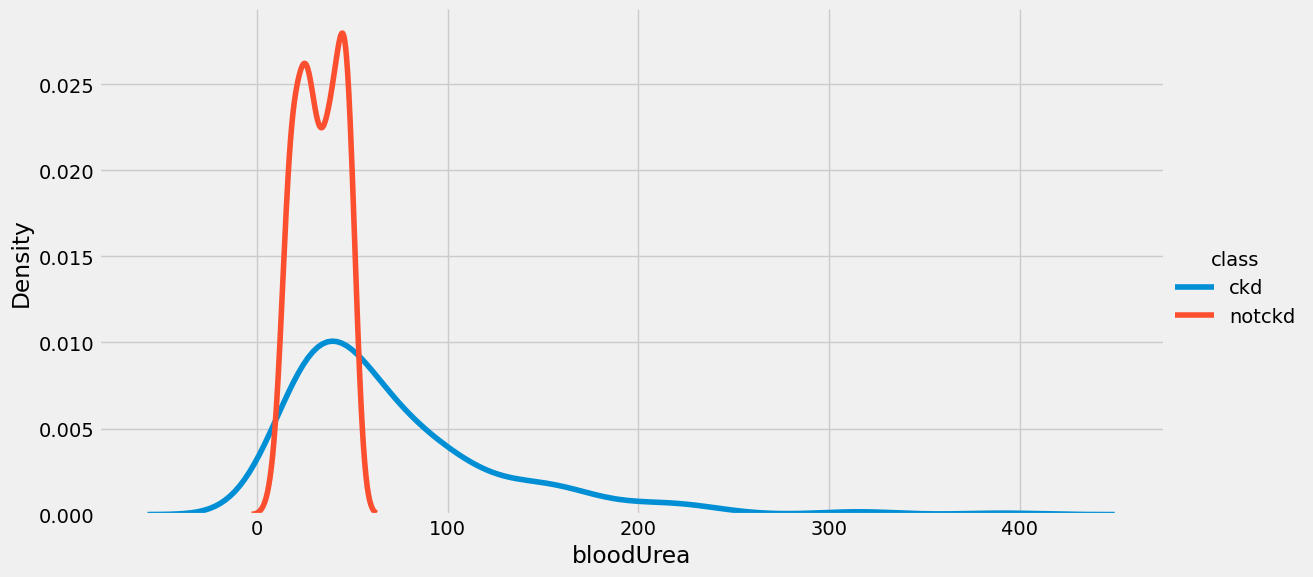

In [21]:
kdePlot('bloodUrea')

In [22]:
violinPlot('specificGravity')

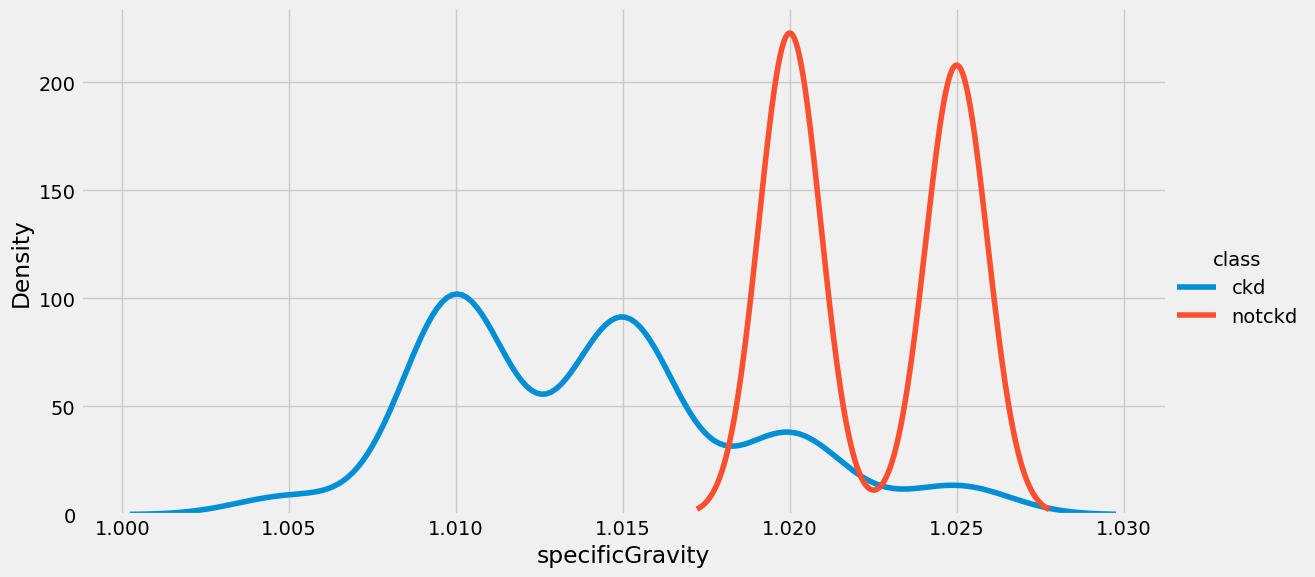

In [23]:
kdePlot('specificGravity')

In [24]:
scatterPlot('haemoglobin','packedCellVolume')

In [25]:
scatterPlot('redBloodCellCount','packedCellVolume')

In [26]:
scatterPlot('packedCellVolume','bloodUrea')